## Week 3 Exercise

**Assignment**: This exercise will use Google BigQuery to explore the GSOD weather dataset.  Specifically, you will:
  
* Use the <code>read_gbq</code> to retrieve data from the GSOD dataset
* Use pandas to describe the data
* Use SQL-like syntax to return summarized data to pandas from BigQuery
* Use <code>pivot</code> to display the data by month and year
* Formulate data science research questions
* Compare and contrast PaaS versus build-it-yourself analytics solutions
* Discuss approaches to optimizing aggregation performance in a PaaS workflow

For this exercise, you will have to complete all the tasks within this notebook, save the entire notebook, and then upload into the Week 3 Assignment for your group on BlackBoard. Save this notebook with a new name with the following format:

**Week_3_Exercise_Group_group_number.ipynb**

These in-class exercises are designed to allow you to explore Python with your group and **DO NOT** include step-by-step directions or answers that have only one possibility. Use your team and other resources to determine how best to complete them. Make sure before you turn in your notebook that it runs without errors and the requested output is visible in the notebook. If you go through multiple steps in your code, make sure all those steps are included so that we can evaluate your work.

We are going to begin by exploring the GSOD dataset. Additional details about it can be found here:

* http://www1.ncdc.noaa.gov/pub/data/gsod/readme.txt

To begin, use the <code>read_gbq</code> function to retrieve the temperatures and dew points for the year 2000 for days when there was hail from the <code>[publicdata:samples.gsod]</code> dataset in BigQuery. Complete the other tasks in the code block.

NOTE: these queries may take up to a few minutes.

In [10]:
# Create a dataframe from the criteria above and print it.
import pandas as pd
from pandas.io import gbq

query = """SELECT mean_temp, mean_dew_point, hail
           FROM [publicdata:samples.gsod]
           WHERE year = 2000 AND
           hail = true""" 

project_id = 339278824797

%time gsod_year = gbq.read_gbq(query, project_id, reauth=True)

Your browser has been opened to visit:

    https://accounts.google.com/o/oauth2/auth?scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fbigquery&redirect_uri=http%3A%2F%2Flocalhost%3A8080%2F&response_type=code&client_id=495642085510-k0tmvj2m941jhre2nbqka17vqpjfddtd.apps.googleusercontent.com&access_type=offline

If your browser is on a different machine then exit and re-run this
application with the command-line parameter 

  --noauth_local_webserver

Authentication successful.
Waiting for job to complete...
Wall time: 33 s


In [9]:
print gsod_year

        mean_temp  mean_dew_point  hail
0       54.099998       50.000000  True
1       55.500000       53.400002  True
2       78.900002       69.400002  True
3        7.100000        4.700000  True
4       49.799999       47.500000  True
5       44.000000       42.700001  True
6       49.000000       46.000000  True
7       30.000000       29.200001  True
8       55.700001       48.299999  True
9       70.300003       58.599998  True
10      50.599998       46.900002  True
11      13.600000        9.600000  True
12      33.299999       26.600000  True
13      44.500000       43.900002  True
14      37.200001       33.599998  True
15      13.600000        7.800000  True
16      35.000000       32.400002  True
17      35.000000       33.700001  True
18      43.099998       27.000000  True
19      55.200001       49.599998  True
20      46.900002       45.599998  True
21      61.400002       56.200001  True
22      34.099998       29.900000  True
23      56.500000       55.799999  True


In [11]:
# Print the average average dewpoint of that dataframe
gsod_year['mean_dew_point'].mean()

44.29359181399203

In [8]:
# Print the number of observations in this dataframe (remember len or you can use shape)
print "The number of observations is:", len(gsod_year.index)

The number of observations is: 201053


In [12]:
# Print the mean average temperatures
print 'The mean of the average temperatures is:', gsod_year['mean_temp'].mean()


The mean of the average temperatures is: 49.4096496923


In [13]:
# Print the max average dew points
print 'The maximum average dew point is:', gsod_year['mean_dew_point'].max()

The maximum average dew point is: 81.8000030518


Next, use BigQuery to return the average temperatures by month and year for <code>[publicdata:samples.gsod]</code> dataset to a new dataframe. Make sure the returned data is ordered by year and month in ascending order. 

The format should be similar to:

```
YEAR|MONTH|AVERAGE_TEMP

```

In [14]:
# Create new dataframe with average temps by year and month

bq_sql = """SELECT year, month, AVG(mean_temp) AS average
            FROM [publicdata:samples.gsod]
            GROUP BY year, month"""

avg_temps = gbq.read_gbq(query=bq_sql, project_id=project_id)

Waiting for job to complete...


In [15]:
# Print the dataframe to check everything returned successfully
avg_temps

,year,month,average
0,2001,7,68.972626
1,1967,7,68.587343
2,1960,3,38.622839
3,2008,8,67.621774
4,1968,10,51.628515
5,1999,2,42.647275
6,1974,1,29.962556
7,1981,7,68.517613
8,1979,1,30.825075
9,1998,8,68.757544


Next, use <code>pivot</code> to create a new dataframe that has years as the rows and months as the columns with the average temperatures as the values.

In [16]:
# Create new dataframe years as rows and months as columns

weather_pivot = avg_temps.pivot(index='year', columns='month', values='average')

In [17]:
# Check your dataframe

weather_pivot

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
1929,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.552419,61.326050,50.621242,47.099176,45.378191
1930,44.163850,39.853899,43.270230,46.599473,51.237458,57.698947,58.298314,58.918475,57.153560,51.519969,46.136177,44.314176
1931,40.092450,39.418145,40.051609,45.876256,54.498975,57.688132,60.381612,59.246772,54.164261,49.858608,46.782015,42.947512
1932,42.342675,37.722322,40.325677,45.586797,52.487500,57.823568,62.487951,63.536674,57.878073,48.883118,44.865633,41.651515
1933,25.108781,26.484806,35.136130,45.681567,53.600194,61.214586,66.697012,64.088348,56.912050,46.672938,35.093949,23.549939
1934,25.558667,28.951797,31.393821,42.464663,54.914565,61.393637,65.402756,63.697542,55.672398,47.890559,35.742462,31.208043
1935,35.692810,38.699013,40.427805,46.930683,52.800586,62.859852,66.289622,65.143001,56.734061,46.693568,32.657492,28.439163
1936,26.874337,32.631704,31.975906,41.136881,52.629241,62.701364,65.314259,62.941622,56.241599,45.027240,39.560133,35.622059
1937,20.851161,25.118499,29.263568,42.349854,55.077898,62.177870,66.335080,65.181082,58.007044,46.966315,34.186945,24.591963


To save time, I have created a function called <code>box_plot</code> which will take a properly formatted dataframe and create an inline boxplot. Run the code in the follow block to read it into the namespace.

In [30]:
import matplotlib.pyplot as plt
import pylab
import numpy as np
import calendar
%matplotlib inline
pylab.rcParams['figure.figsize'] = 16, 10  #default image size for this interactive session

def box_plot(weather):
    """
    Take a dataframe of years in rows, months in columns, temps in values and return a boxplot.
    """
    weather.dropna(inplace=True)
    plt.figure('weather')
    plt.boxplot(weather.values)
    month_list=[calendar.month_abbr[i] for i in np.arange(1,13)]
    plt.xticks(range(1,13),month_list, rotation=15)
    plt.xlabel('Month')
    plt.ylabel(u'Average Temperature in F\u00b0')
    plt.title('GSOD Temperatures by Month for All Years and All Stations')
    plt.show()

Use <code>box_plot</code> to create the plot.

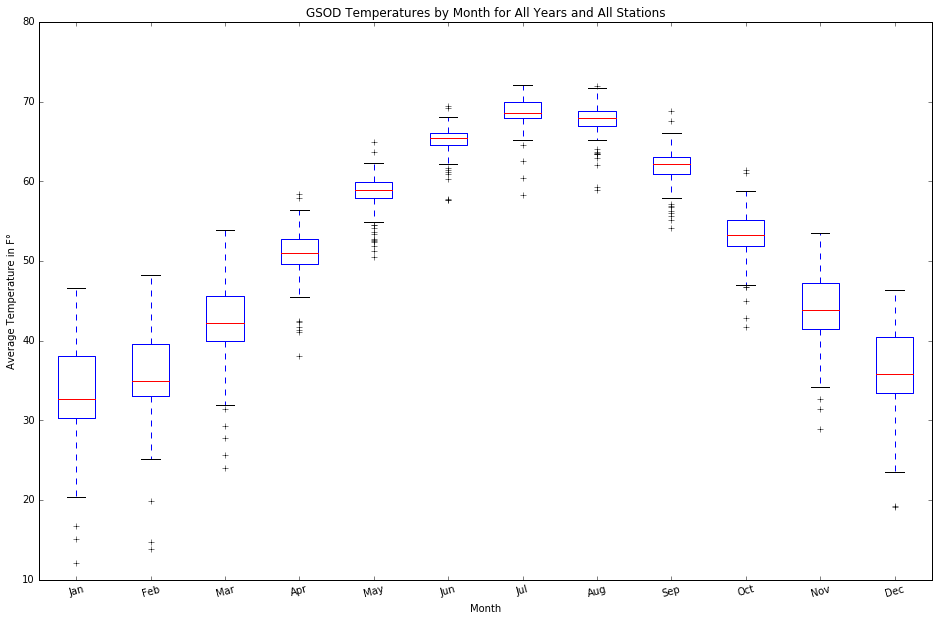

In [32]:
# Use box_plot to plot your dataframe

box_plot(weather_pivot)

## Written Response 1
**What observations can you make about this dataset from the boxplot (you can use bullets in your response)?** 
>* It is hotter in the summer and colder in the winter.
* The temperature variance is significantly greater in the winter than in the summer.
* It is harder to predict the average temperature in the winter than in the summer.
* The middle point (median) is closer to the 25th percentile in the colder months.
* The mean is not shown in this box plot.

## Written Response 2
**Recalling the article that discussed understanding how and where the data was generated, what might you want to know about this data before you can intepret a plot like the above? Does the GSOD website contain data to help with this? Does this change your observations?** 

>GSOD website: https://data.noaa.gov/dataset/global-surface-summary-of-the-day-gsod

>* When is the data collected (consistent times each day)?
* With what frequency is it collected?
* Where is the data collected? Geographic location.
* Where is the data collected? sun, shade, wind protection?
* Is this consistent throughout the year and years?
* What restrictions does each country put on the data they report?
* What data was not included by the reporting country?
* What type of equipment is used in each location (how sensitive, accurate, etc.)?
* How many observations are recorded for this mean temp?
* How many hours does the weather station that recorded this operate on the day reporting?
* Does this station report only during one calendar day or for a 24 hour shift which may span between days?

>Many of our questions can not be answered from the data provided by the GSOD website.  The fact that this information is not available does not change our basic observations, but depending on the purpose of our analysis it certainly could change the level of comfort we have with making claims about what we know as a result. 

>If we did have more of this data we could segment our recordings and reports so that we treat smaller samples differently than a larger sample size for example. The small sample size could result from low number of recordings due to limited hours of operation, or not recording every day in some cases.  Or we may chose to only look at data we know is recorded in a single day, excluding those stations that have data from portions of 2 days but reported as a single day.

>We may also give an accuracy score to the data if knew the equipment used by each station. Those with more accurate recording would have a higher score and therefore more weight in our analysis than a station which uses cheaper, or less accurate tools and techniques.  

## Written Response 3
**Using the BigQuery UI, explore some of the other public datasets. Think of a research question for one of the datasets and enter it here along with why it might be interesting to explore.**

>**Proposed research question:** Is there a correlation between the # of cigarettes smoked per day and the baby's health as measured by the apgar score?

>**A few words about our methodology:**

>In our case we would create more than one dataframe for analysis.  First we would probably look at smokers and the number of cigarettes they smoke per day. We would compare them to non-smokers, but would exclude those who report they also use alcohol so that we are looking at only one proposed damaging factor. We would next create a dataframe that included those who use alcohol and group our data by those who use and those who don't use alcohol. We would possibly look at a few other factors as well to determine if it is cigarette smoking or possibly something else involved such as mother's age.

>According to Wikipedia here is a statement about the Apgar score and its history as a measure of newborn's health "Virginia Apgar invented the Apgar score in 1952 as a method to quickly summarize the health of newborn children."

>**From BigQuery description of natality database:**

>"This table describes all United States births registered in the 50 States, the District of Columbia, and New York City from 1969 to 2008. The Centers for Disease Control (CDC) and Prevention's National Center for Health Statistics (NCHS) receives this data as electronic files, prepared from individual records processed by each registration area, through the Vital Statistics Cooperative Program. You can access the CDC's data at: http://www.cdc.gov/nchs/data_access/Vitalstatsonline.htm"

>**Database columns:** (with key fields related to our research in bold)


>| Column  |  Headers  | ...  |
|---|---|---|
| source_year	  | mother_residence_state  |  born_alive_alive |
|  year | mother_race  | born_alive_dead  |
|month   |  mother_age | born_dead  |
|day   | gestation_weeks  |  ever_born |
| wday  | lmp | father_race  |
| state | mother_married  | father_age  |
| is_male  | mother_birth_state  | record_weight  |
| child_race  | **cigarette_use**  |   
|weight_pounds   |  **cigarettes_per_day** |   
|  plurality | **alcohol_use**  |   
| **apgar_1min**  | drinks_per_week  |   
| **apgar_5min**  |  weight_gain_pounds |   

**Why would this be interesting?** 

>It would be good to know if smoking 1-5 cigarretes per day is harmful or not. Or more specifically, is there a magic number where the effects become more damaging? Does the Apgar score improve significantly if a mother smokes 2 or fewer cigarettes a day compared to someone who smokes 3 or more? Does age have an impact? Do alcohol and cigarretes have a "1 + 1 = 3" type of effect. It will also be interesting to play with the data a bit more as we discussed in our proposed methodology.

>Today there isn't much controversy about the effects of smoking on a fetus.  It is widely accepted that this is true. But could a woman smoke only 2 cigarettes a day and be fine?  Is it smoking that makes the difference or is alcohol the true damaging factor, or the mother's age?  Perhaps the real problem is a combination of a number of risk factors.  To determine these answers it would be very interesting to not only look at the data directly related to our research question, but also to compare this with other results so that we can rule out some other cause.


## Written Response 4
(Enter Your Response in This Cell)

Some recent IT articles have suggested most firms deal with small or medium data rather than Internet-scale or "big data".

**What upsides and downsides do you see for a firm that has medium or small data using technologies that were built for large scale applications at companies like Google and Amazon?**

> **Upsides**

>They can scale more easily as their needs grow, if a firm stayed with smaller applications the ability to scale often becomes a function of purchasing more server equipment. This is an expensive way to go so the model provided by PaaS companies like Google and Amazon (and Microsoft because Chester lived in Redmond for a couple decades), is much easier to deal with, it responds not only to scaling up requirements, but is also much easier to scale down.  And no expensive hardware sits around idle as a result.

>As a cost factor, as they grow the price per data segment (or physical space) gets cheaper than it is with traditional technologies. This is related to the factor mentioned above about having to purchase new and expensive servers rather than depending on cheaper clusters of servers as these cloud services do.

>They reduce their dependence on highly paid DBA's.  These new technologies don't have the extensive rules about data modeling as the traditional techniques. Although administration of data doesn't go away it becomes cheaper the more data you have. So just like we see in servers the staff costs do much the same... at least that's how the future looks at this point.

>The opportunities are huge. This is probably the biggest factor. At the present time, beginning to use big data techniques is a great competitive advantage over those who don't.  But going forward this will probably simply become the minimum requirement to compete.

>Improved security. It is unlikely that they will be able to match Google or Amazons' security effectiveness. In today's world the ability to draft off of the security acumen of Google or Amazon is a significant benefit.

>Cloud based solution gives you the flexibility to access your data anywhere you have internet access.

>Besides... it's really cool.

> **Downsides**

>It's new, and somewhat unknown. This is true at least compared to the older database techniques which have cleansed data nicely organized.  It is believed by many of the old-guard that this is more dependable information.  New is always a bit untrusted. That view is not completely wrong.  Pulling information from unstructured or semi-structured "big data" can inform a decision but caution should be used because it is new, like everything else it has to prove itself to be accurate. Of course it's come a long way,and it will continue to improve.

>DBA's probably won't go away completely, you will always have the structured data that they maintain.  And although being un-structured sounds like it would be great, it will still require adminstration of the data so that the analytics off this data is reliable.

>This new technology creates the need for new employee training and produces new securty risks. The risks are multiple when you are collecting information rapidly and un-structured. Do you have personal information (PII) that you didn't intend to collect?  Do you have intellectual property that belongs to others? Do you have a way to determine the answers to these questions?

>Also you are at the mercy of the service provider, you will likely need to make changes to your business continuity planning just in case you lose the ability to use this cool new tool.  As we read in some of our cases last quarter for Enterprise Systems, where a number of hospitals lost the new patient recording system they have come to rely on.  You can't just move to another system quickly, and may not be able to use a failover system. You may have to go back to a manual system for awhile to stay in business. This sort of scenario needs to be planned for and practiced.

>Access to your data is dependent on effective internet access. Less of an issue today, but still something that needs to be taken into account and planned for.

>Some of these responses informed by the following articles 

>http://www.techrepublic.com/blog/10-things/10-things-you-should-know-about-nosql-databases/

>http://www.businessnewsdaily.com/4427-cloud-computing-small-business.html

## Written Response 5
(Enter Your Response in This Cell)

**What are the benefits and drawbacks of a "big data" technology strategy that:**

**uses a PaaS analytics provider like Google?**

>From the question it seems like the benefits and drawbacks for PaaS analytics providers are similar to the responses we provided in Question 4. Depending on the needs of a company the PaaS allows the costs to be expensed in the month costs are incurred. This expense cannot be capitalized and depreciated as the solution below would be.  So this could be a benefit or drawback depending on the company.

>PaaS as mentioned in question 4 may reduce the need for the number of DBA's but it won't eliminate the need.  Also PaaS will reduce the need for network infrastructure admins as well.  The hardware and much of the networking infrastructure is maintined by the PaaS supplier.  

>Also mentioned is the ability to scale up and scale down more easily. This makes the culture of testing more easy to deal with.  Running a temporary analytics or big-data test won't require significant investment.  This is a big advantage for a mid to small company. If you are a large organization it may not matter so much.  You can have an internal cloud infrastructure that will get used. In such an organization there are so many tests done that as one test comes to an end, another is coming online.

>With a PaaS solution you benefit from the knowledge that Google learns from working with multiple customers.  if someone else makes a suggestion that changes the service it could also benefit you.  However, you may also not have as much ability to customize in such an environment.  This is however less and less true.

>The ability to access and work with your data from anywhere you have an internet connection. However, if you do not have internet access you cannot access your data. This needs to be taken into account and planned for.

>Access to PaaS provider and opensource provided  precongigured software that can accelerate and improve your abilities.

**uses open-source software like Hadoop or Spark on the firm's server infrastructure?**

>**The benefits**  are that the firm controls all aspects of the data. In theory you have the ability to customize the system exactly as you need it and you have control down to the bare metal.  Actually you have control beyond that since you get to pick the processors and which firmware is upgraded and such.  You get to time when these updates occur so that they coincide with a schedule that works out for you, rather than you potentially having to adjust to their schedule.    

>**The drawbacks**  are that no matter what, the typical firm does not have the resources to duplicate the infrastructure available through Google.  A firm could derive some benefit by purchasing their own hardware but keeping it in a data center commercially available.  This would allow them to experience some of the benefits such as redundant power, connection to the internet, physical security of the center and environmental controls.  But if they tried to create their own data center, or more importantly redundant data centers they will have to sink a lot of money to do so.  Course they could depreciate all these costs, so that's a positive.  But they sink those costs even if they don't end up needing all of them. One of the benefits of flexible scaling from a PaaS like Google is that a firm can easily do testing. They can spin up a couple dozen computers, run a test for a month or a year. Depending on the results, they can spin up 10X the servers or shut them all down and in this later case the costs go away. If they built it all themselves they keep paying even if the test failed. *This does create a decent secondary market for used servers however*. 

